V. Analyse des résolutions spectrale et dynamique de la TFD

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal.windows as scw
from numpy.fft import fft, ifft, fftshift

Nos queremos encontrar a frequencia e a amplotude original, entao devemos usar hamming ou rectangulo para ponderar cada um desses casos?
Se a diferenca de frequencia entre dois sinais é muito pequena, precisamos aumentar o valor de amostras(N).

Lembrar que a figura que vemos no TP04 vai ser copiada para cada dirac, entao para separar duas feequencias proximas, teremos dois picos proximos, entao o interessante é que os lobes em copia estejam mais separados possivel.

Ja no caso onde temos dois sinais com frequencias diferentes e amplitudes tambem muito diferentes , é melhor hamming poir teremos um grande lobe e os secundarios pequenos(pensar no espectro)

1/ Construction des signaux composites (somme de sinus)
Ecrire un programme permettant de générer les signaux suivants :
- Un signal « signal 1 » composé de la somme de deux signaux sinusoïdaux de même amplitude
et de fréquences proches (0,1 et 0,105).
- Un signal « signal 2 » composé de la somme de deux signaux sinusoïdaux d’amplitude très
différentes (1 et 0,05) et de fréquences respectives 0,1 et 0,15.
Observer les signaux 1 et 2 sur un nombre de points suffisamment grand.

Quando o sinal tem frequencias muito proximas, qual janela é melhor?
quando nos ponderemos um seno com uma janela, 
Como no espectro de frequencia teremos dois impulsos multiplicados com uma janela, para que conseguimos diferenciar as duas frequencias é precisoq ue o lobe principal seja pequeno. 

Como nesse caso temos amplitudes diferentes, é melhor hammig. 

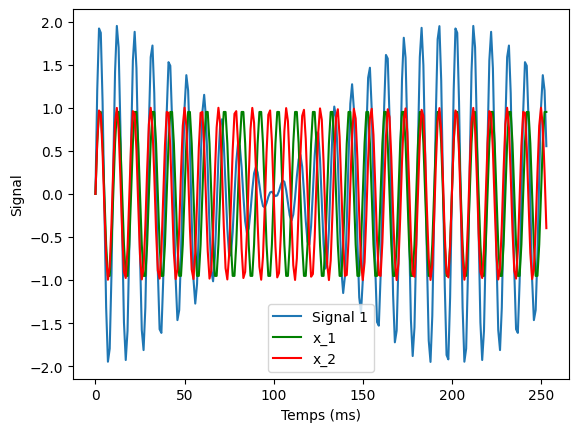

In [20]:
#Signal 1
N=254
Fe=1; Te=1/Fe; 
k=np.arange(0,N,1) # N nao esta incluso na lista, ela vai de 0 a N-1
t=Te*k

fo_1=0.1
x_1=np.sin(2*np.pi*fo_1*k)
fo_2=0.105
x_2=np.sin(2*np.pi*fo_2*k)

signal_1=x_1+x_2

plt.figure()
plt.plot(t,signal_1,label='Signal 1');
plt.plot(t,x_1,'g',label='x_1');
plt.plot(t,x_2,'r', label='x_2');
plt.xlabel('Temps (ms)');plt.ylabel('Signal')
plt.legend()


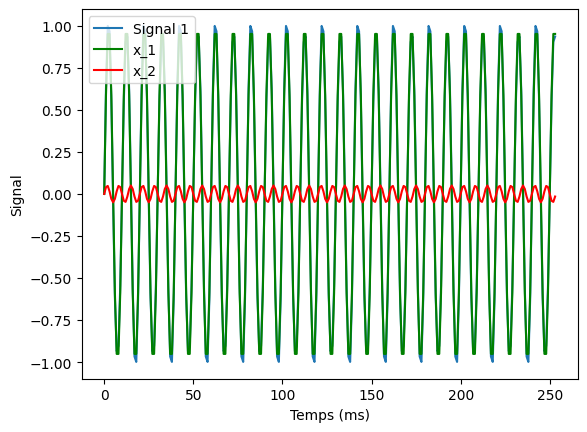

In [21]:
#Signal 2
N=254
k=np.arange(0,N,1) # N nao esta incluso na lista, ela vai de 0 a N-1
Fe=1; Te=1/Fe; 
t=Te*k

fo_1=0.1
x_1=np.sin(2*np.pi*fo_1*t)
fo_2=0.15
x_2=0.05*np.sin(2*np.pi*fo_2*t)

signal_2=x_1+x_2

plt.figure()
plt.plot(k,signal_2,label='Signal 1');
plt.plot(k,x_1,'g',label='x_1');
plt.plot(k,x_2,'r', label='x_2');
plt.xlabel('Temps (ms)');plt.ylabel('Signal')
plt.legend()


<StemContainer object of 3 artists>

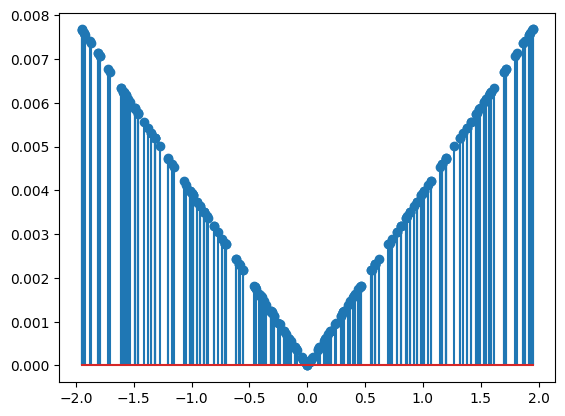

In [ ]:
# #Analyse freequentille
# pontos_fft=N

# Signal_1 = fftshift(fft(signal_1))
# x_1 = np.arange(-1/2, 1/2, 1/N)
# plt.figure()
# plt.stem(signal_1, np.abs(signal_1)/N)




2/ Mise en évidence de la résolution spectrale (aptitude à discerner en fréquence deux raies
proches l’une de l’autre)

In [14]:
rect=np.ones(N)
ham = scw.hamming(N)
blk = scw.blackman(N)



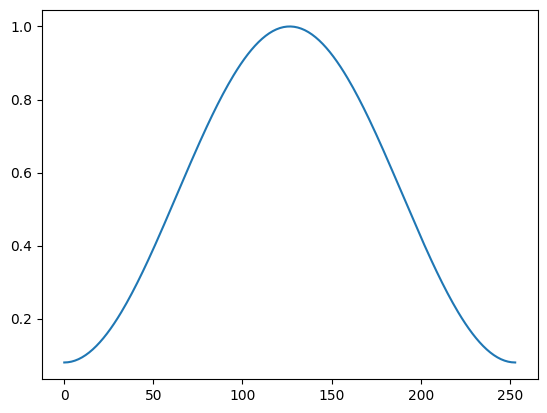

In [18]:
np.convolve(signal_1,ham)
plt.plot(k, ham, label = "Hamming");